In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Histograms

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'Number of Jobs')

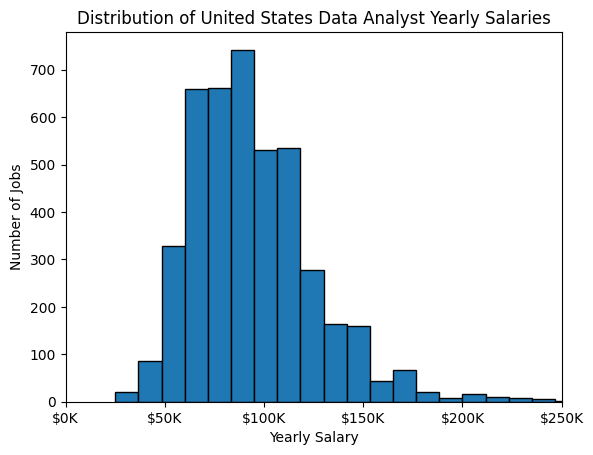

In [13]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca() # gca = Get Current Axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

Boxplots

In [ ]:
#Filter for Data Analyst Jobs
df_DA_bx = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN
df_DA_bx = df_DA_bx.dropna(subset=['salary_year_avg'])

C:\Users\Joseans-M17\AppData\Local\Temp\ipykernel_17428\1093510635.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


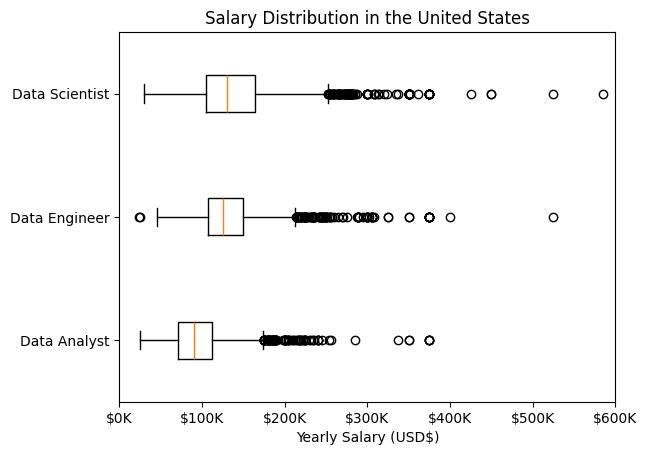

In [18]:
# Pandas plotting
# df_DA_bx['salary_year_avg'].plot(kind='box', vert=False)

# Using Matplotlib
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Filter to job_titels
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD$)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

Skill Pay Analysis

In [31]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [34]:
#Filter for Data Analyst Jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

In [43]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_TP = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_SK = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=True)

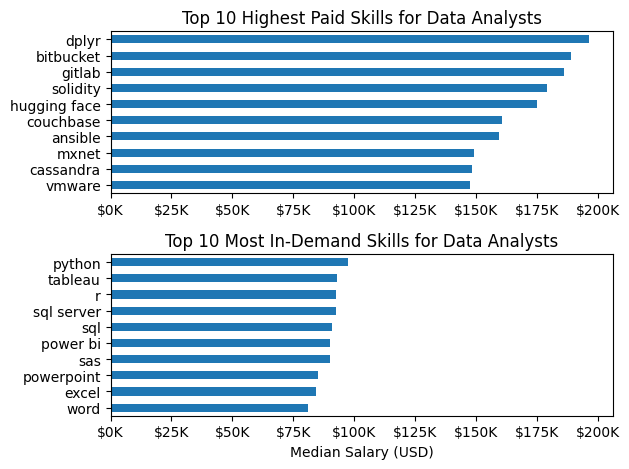

In [51]:
fig, ax = plt.subplots(2, 1)

# You can invert Y axis by using ax[#].invert_yaxis() in a new line or by adding [::-1] at the end of the variable before plotting
df_DA_TP[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_SK.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()